# 3.1 EDA on Haberman Dataset

In [18]:
import warnings 

warnings.filterwarnings("ignore") 

In [3]:
#importing all the libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
haberman = pd.read_csv("habermans.csv")
haberman.head()

,age,op_year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
# data-points and features?
print (haberman.shape)

(306, 4)


In [5]:
#name column names in our dataset?
print (haberman.columns)

Index(['age', 'op_year', 'axil_nodes', 'survival_status'], dtype='object')


In [7]:
#how many datapoints for each  status is present
haberman["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

observation:It concludes that 225 (status -1) patients are survived more than 5 years, and 81 (status-2) patients are survived less than 5 years

# (3.2)  2-D Scatter Plot

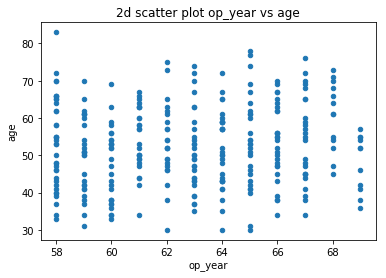

In [8]:
haberman.plot(kind='scatter', x='op_year', y='age') ;
plt.title('2d scatter plot op_year vs age')
#plt.grid()
plt.show()




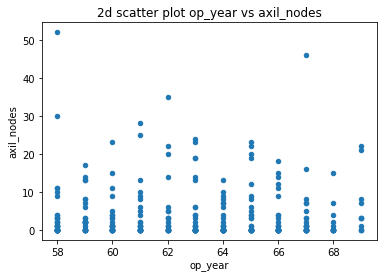

In [9]:
haberman.plot(kind='scatter', x='op_year', y='axil_nodes') ;
plt.title('2d scatter plot op_year vs axil_nodes')
plt.show()


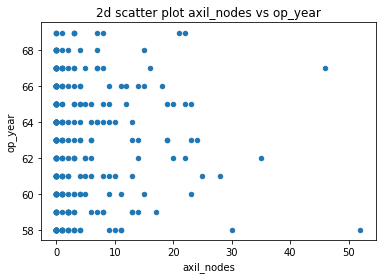

In [10]:
haberman.plot(kind='scatter', x='axil_nodes', y='op_year') ;
plt.title('2d scatter plot axil_nodes vs op_year')
plt.show()


observation: in 2d scatter plot i had drawn 3 plots in between age,year,nodes it shows all the data in overlap fashoin and also in same color unable to distinguish between the data 

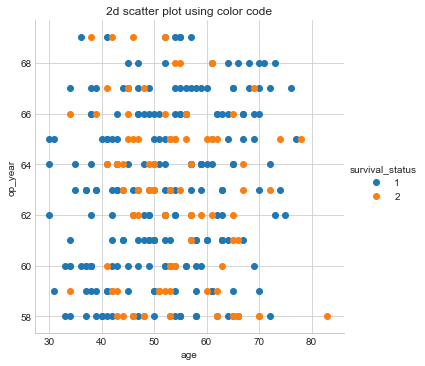

In [11]:
#2d scatter plot using color code for the survival status in haberman
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", size=5)\
   .map(plt.scatter, "age", "op_year")\
   .add_legend();
plt.title('2d scatter plot using color code')
plt.show();

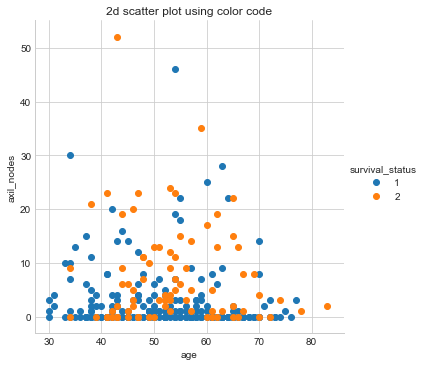

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", size=5)\
   .map(plt.scatter, "age", "axil_nodes")\
   .add_legend();
plt.title('2d scatter plot using color code')
plt.show();

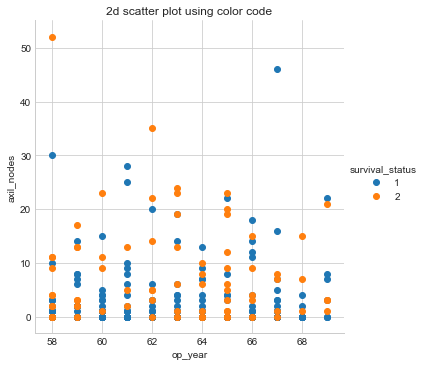

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", size=5)\
   .map(plt.scatter, "op_year", "axil_nodes")\
   .add_legend();
plt.title('2d scatter plot using color code')
plt.show();

observation: i have imported function like facetgrid from seaborn library due to which we are able to distinguish between the colors since both colors are still overlapping cannot differnetiate for survival status

# (3.3) Pair-plot

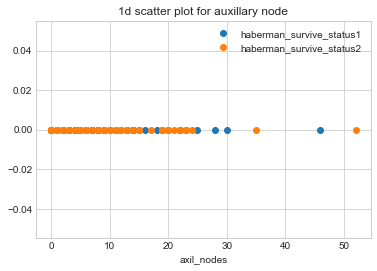

In [50]:
#1-D scatter plot of auxillary nodes
import numpy as np
haberman_survive_status1 = haberman.loc[haberman["survival_status"] == 1];
haberman_survive_status2 = haberman.loc[ haberman["survival_status"] == 2];
plt.plot(haberman_survive_status1["axil_nodes"], np.zeros_like(haberman_survive_status1['axil_nodes']), 'o')
plt.plot(haberman_survive_status2["axil_nodes"], np.zeros_like(haberman_survive_status2['axil_nodes']), 'o')
plt.xlabel('axil_nodes')
plt.title('1d scatter plot for auxillary node')
plt.gca().legend(('haberman_survive_status1','haberman_survive_status2'))




plt.show()


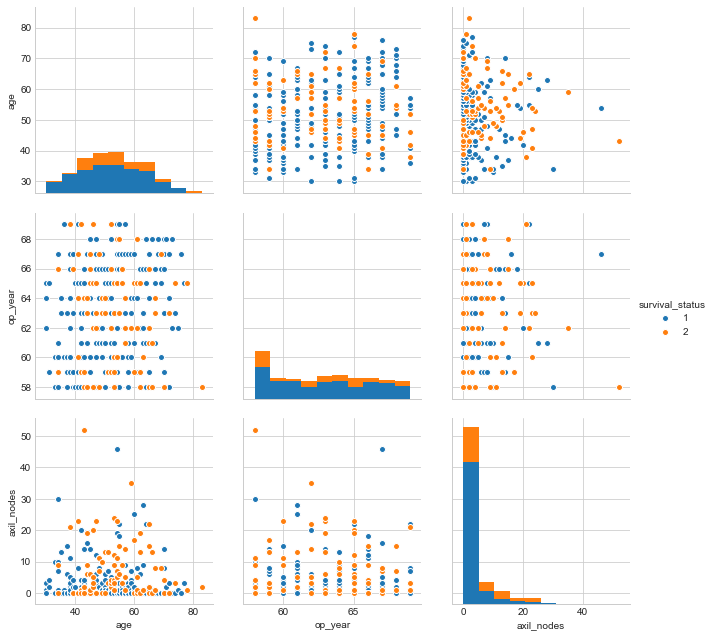

In [16]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status", size=3, vars = ['age', 'op_year', 'axil_nodes'])


plt.show()

# observation:
Above upper diagnoal and lower diagnoal graphs are same, only the axis between them are interchanged .and also all the datapoints are in overlapped state cannot distinguish between them.



# (3.4) Histogram, PDF, CDF

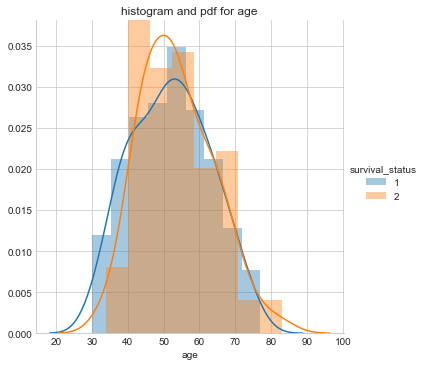

In [19]:
sns.FacetGrid(haberman, hue="survival_status", size=5)\
   .map(sns.distplot, "age")\
   .add_legend();
plt.title('histogram and pdf for age')
plt.show();

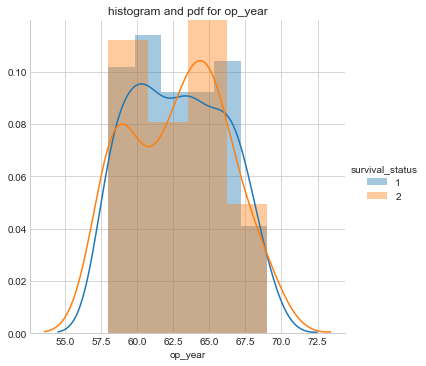

In [20]:
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "op_year") \
   .add_legend();
plt.title('histogram and pdf for op_year')
plt.show();

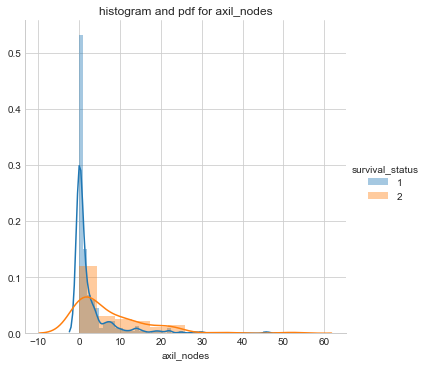

In [21]:
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.title('histogram and pdf for axil_nodes')
plt.show();

# observation:
* plot-1 : Major overlapping is observed, which tells us that survival chances are irrespective of a person’s age.
* plot-2 : There is major overlapping observed. 
* plot-3 : Patients with no nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


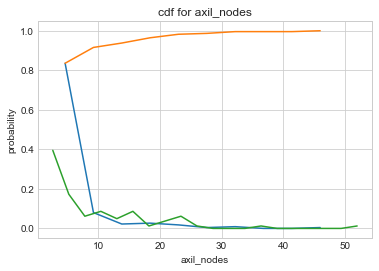

In [55]:
#plotting cdf for nodes
counts, bin_edges = np.histogram(haberman_survive_status1['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('axil_nodes')
plt.ylabel('probability')



counts, bin_edges = np.histogram(haberman_survive_status2['axil_nodes'], bins=20, 
                             density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.title('cdf for axil_nodes')

plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


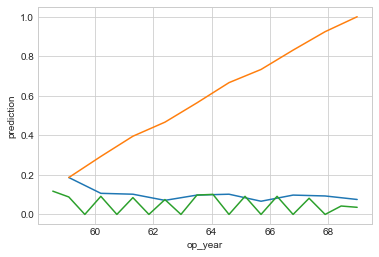

In [56]:
#plotting cdf for year
counts, bin_edges = np.histogram(haberman_survive_status1['op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('op_year')
plt.ylabel('prediction')


counts, bin_edges = np.histogram(haberman['op_year'], bins=20, 
                              density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);


plt.show();

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


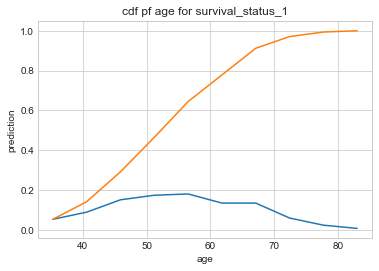

In [47]:
#plotting cdf for ages
counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')
plt.ylabel('prediction')
plt.title('cdf pdf age for survival_status_1')


counts, bin_edges = np.histogram(haberman['age'], bins=20, 
                                density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


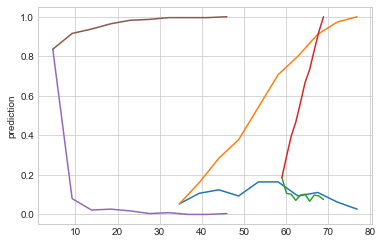

In [57]:
#plotting cdf at a time for all the features
counts, bin_edges = np.histogram(haberman_survive_status1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# op_year
counts, bin_edges = np.histogram(haberman_survive_status1['op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# axil_nodes
counts, bin_edges = np.histogram(haberman_survive_status1['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.ylabel('prediction')


plt.show();

# (3.5) Mean, Variance and Std-dev

In [26]:
import numpy as np
print("Means for axil node feature")
print('mean for survival status-1 people',np.mean(haberman_survive_status1['axil_nodes']))
print('mean for survival status-2 people',np.mean(haberman_survive_status1['axil_nodes']))
print('Mean with an outlier')
print('meanfor survival status-1 people',np.mean(np.append(haberman_survive_status1['axil_nodes'],50))); #added outier point to find out the mean
print('mean for survival status-2 people',np.mean(haberman_survive_status2['axil_nodes']))


print("\nStd-dev:");
print('standard deviation of status_1 people :',np.std(haberman_survive_status1['axil_nodes']))
print('standard deviation of status_1 people:',np.std(haberman_survive_status2['axil_nodes']))


Means for axil node feature
mean for survival status-1 people 2.7911111111111113
mean for survival status-2 people 2.7911111111111113
Mean with an outlier
meanfor survival status-1 people 3.0
mean for survival status-2 people 7.45679012345679

Std-dev:
standard deviation of status_1 people : 5.857258449412131
standard deviation of status_1 people: 9.128776076761632


# 3.6  Median, Percentile, Quantile, IQR, MAD

In [27]:
import numpy as np
print("\nMedians:")
print(np.median(haberman_survive_status1["axil_nodes"]))
#Median with an outlier
print(np.median(np.append(haberman_survive_status1["axil_nodes"],50)))
print(np.median(haberman_survive_status2["axil_nodes"]))



print("\nQuantiles:")
print(np.percentile(haberman_survive_status1["axil_nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_survive_status2["op_year"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_survive_status1["axil_nodes"],90))
print(np.percentile(haberman_survive_status2["axil_nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_survive_status1["axil_nodes"]))
print(robust.mad(haberman_survive_status2["axil_nodes"]))




Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[58. 59. 63. 65.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# (3.7) Box plot and Whiskers

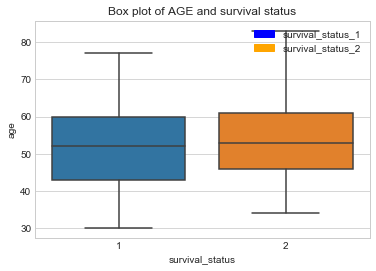

In [41]:

sns.boxplot(x='survival_status',y='age', data=haberman).set_title('Box plot of AGE and survival status')
blue_patch = mpatches.Patch(color='blue', label='survival_status_1')
orange_patch = mpatches.Patch(color='orange', label='survival_status_2')
plt.legend(handles=[blue_patch,orange_patch],loc=1)
plt.show()

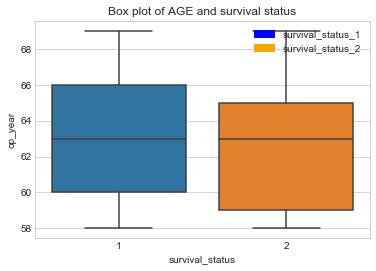

In [32]:

sns.boxplot(x='survival_status',y='op_year', data=haberman).set_title('Box plot of AGE and survival status')
blue_patch = mpatches.Patch(color='blue', label='survival_status_1')
orange_patch = mpatches.Patch(color='orange', label='survival_status_2')
plt.legend(handles=[blue_patch,orange_patch],loc=1)
plt.show()

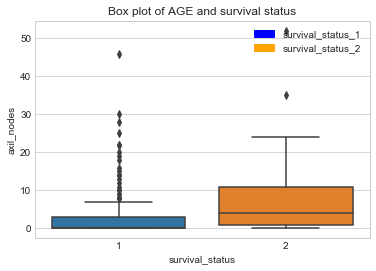

In [34]:
sns.boxplot(x='survival_status',y='axil_nodes', data=haberman).set_title('Box plot of AGE and survival status')
blue_patch = mpatches.Patch(color='blue', label='survival_status_1')
orange_patch = mpatches.Patch(color='orange', label='survival_status_2')
plt.legend(handles=[blue_patch,orange_patch],loc=1)
plt.show()

# (3.8) Violin plots

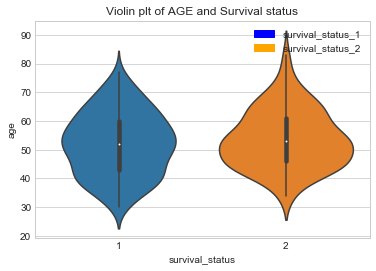

In [35]:
sns.violinplot(x="survival_status", y="age", data=haberman, size=8)
plt.title('Violin plt of AGE and Survival status')
blue_patch = mpatches.Patch(color='blue', label='survival_status_1')
orange_patch = mpatches.Patch(color='orange', label='survival_status_2')
plt.legend(handles=[blue_patch,orange_patch],loc=1)
plt.show()

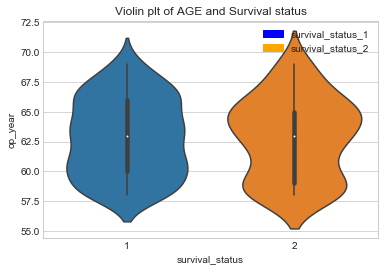

In [37]:
sns.violinplot(x="survival_status", y="op_year", data=haberman, size=8)
plt.title('Violin plt of AGE and Survival status')
blue_patch = mpatches.Patch(color='blue', label='survival_status_1')
orange_patch = mpatches.Patch(color='orange', label='survival_status_2')
plt.legend(handles=[blue_patch,orange_patch],loc=1)
plt.show()

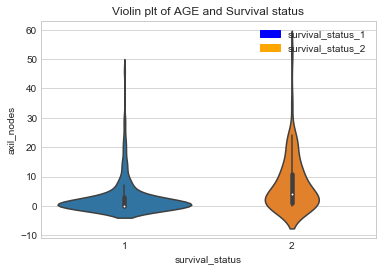

In [42]:
sns.violinplot(x="survival_status", y="axil_nodes", data=haberman, size=8)
plt.title('Violin plt of AGE and Survival status')
blue_patch = mpatches.Patch(color='blue', label='survival_status_1')
orange_patch = mpatches.Patch(color='orange', label='survival_status_2')
plt.legend(handles=[blue_patch,orange_patch],loc=1)
plt.show()

# (3.9) Multivariate probability density, contour plot.

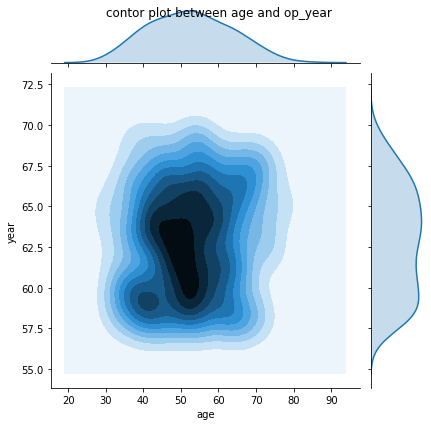

In [34]:
#2D Density plot, contors-plot
import seaborn as sns
sns.jointplot(x="age", y="year", data=haberman, kind="kde");
plt.suptitle('contor plot between age and op_year')
plt.show();

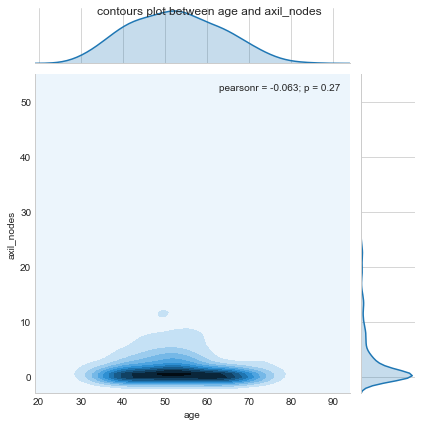

In [39]:
#2D Density plot, contors-plot
import seaborn as sns
sns.jointplot(x="age", y="axil_nodes", data=haberman, kind="kde");
plt.suptitle('contours plot between age and axil_nodes')
plt.show();

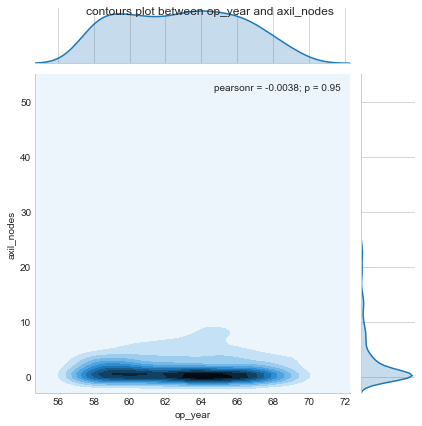

In [40]:
#2D Density plot, contors-plot
import seaborn as sns
sns.jointplot(x="op_year", y="axil_nodes", data=haberman, kind="kde");
plt.suptitle('contours plot between op_year and axil_nodes')
plt.show();

# conclusion:
* Patient’s age and operation year alone are not deciding factors for his/her survival.
* if number of auxillary nodes are less chances of surviving is more i can say Survival chance is inversely proportional to the number of positive axillary nodes.But, We also saw that the absence of positive axillary nodes cannot always guarantee survival.
* The objective of classifying the survival status of a  patient based on the given features is a difficult task as the data is imbalanced.